# MAIN SETUP
Import statements

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# TITANIC STUDY
Dataset about passengers of the titanic

In [2]:
titanic = sns.load_dataset('titanic')

In [3]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Age, Class, and Companionship
Box plot wherein
- x is the class
- y is the age
- the pink boxes are for people with companions and the orange boxes are for people that are alone during the voyage

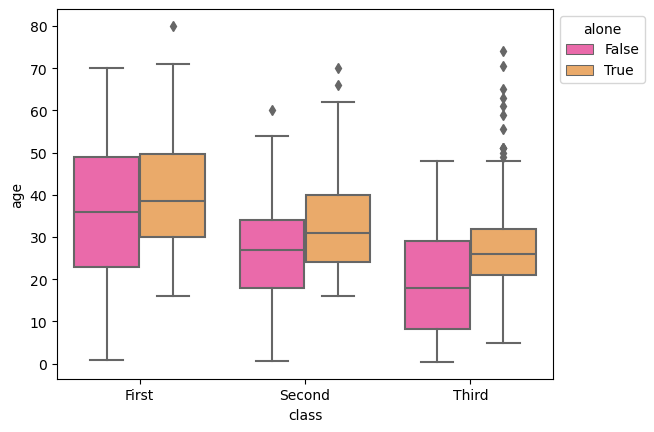

In [4]:
age_dist = sns.boxplot(x='class',y='age',data=titanic,hue='alone',palette='spring')
sns.move_legend(age_dist,'upper left',bbox_to_anchor=(1,1))

###### Distribution
All distributions have outliers except the distribution of passengers in First Class who were travelling with companions, which is also approximately symmetric.

The distribution of solo travellers in Third Class had the most outliers but the interquartile range is also the most concentrated.

### Age, Sex, Survival
Swarm plot wherein
- x is whether they survived or not
- y is their age
- light blue represents males and dark blue represents females.

<Axes: xlabel='alive', ylabel='age'>

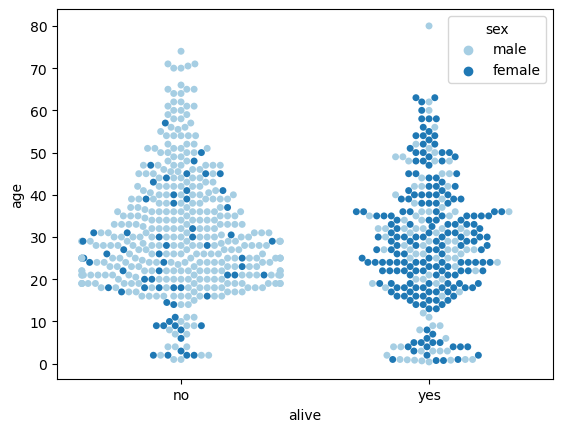

In [5]:
sns.swarmplot(x='alive',y='age',data=titanic,hue='sex',palette='Paired')

###### Correlation
The swarm plot seems to hint at a correlation among the variables. Now, we run a pandas correlation test where
* survived is `0` for a passsenger that did not survive and `1` for a passenger that survived
* adult_male is `0` for a female passenger and `1` for a male passenger
* age is the age of the passenger

In [6]:
titanic[['survived','age','adult_male']].corr()

,survived,age,adult_male
survived,1.000000,-0.077221,-0.557080
age,-0.077221,1.000000,0.280328
adult_male,-0.557080,0.280328,1.000000


###### Distribution and Correlation
The swarm plot shows a seemingly obvious correlation between sex and survival during the Titanic shipwreck. Running pandas correlation tests results in -0.557, considerably a moderate negative correlation between sex and survivorship. 

Based on the swarm plot and correlation tests, there is no correlation between age and survivorship.

### Survivor Count Across Sex and Class

Bar chart where
- x is the passenger's class (1st, 2nd, or 3rd class)
- y is the number of passengers

- dark violet is males who did not survive
- light violet is males who survived
- dark pink is females who did not survive
- light pink is females who survived

In [7]:
surv_conditions = [
    (titanic['sex']=='male') & (titanic['survived']==0),
    (titanic['sex']=='male') & (titanic['survived']==1),
    (titanic['sex']=='female') & (titanic['survived']==0), 
    (titanic['sex']=='female') & (titanic['survived']==1),
]
surv_results = ['male_non_surv','male_surv','female_non_surv','female_surv']
titanic['surv'] = np.select(surv_conditions, surv_results)

In [8]:
custom_color = dict({'male_non_surv':'#8080ed',
                  'male_surv':'#acacf4',
                  'female_non_surv': '#ec7d7d',
                  'female_surv': '#f4bcc0',
                    })

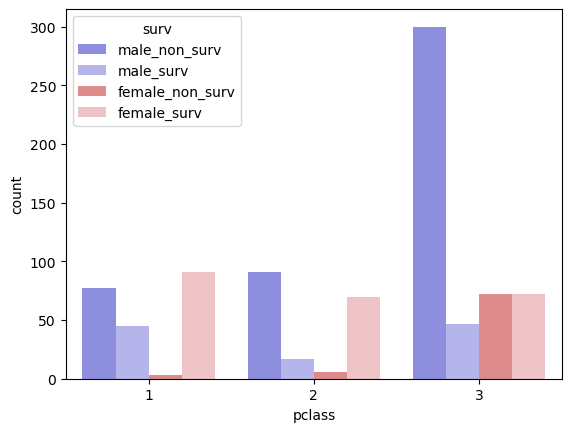

In [9]:
fig = sns.countplot(
    x='pclass',
    data=titanic,
    hue='surv',
    hue_order=('male_non_surv','male_surv','female_non_surv','female_surv'),
    palette=custom_color
)

###### Distribution
It can be seen that in all classes, there were more male non-survivors than female non-survivors, with the most non-survivors being the males in Third Class.

Notably, there were many more female survivors versus female non-survivors in the First and Second Classes but the counts were approximately equal in Third Class.

### Survivor Percentage Across Sex and Class

Multilevel index that shows the percentage of survival across sex and class

In [10]:
# Percentages
## calculating male overall survival
total_ms = len(titanic[titanic['surv']=='male_surv'])
total_m = len(titanic[(titanic['surv'].str.startswith('male'))])

m_percent =  total_ms / total_m *100

## calculating male survival by class
surv_m_class1 = len(titanic[(titanic.surv == 'male_surv') & (titanic.pclass == 1)])
all_m_class1 = len(titanic[(titanic['surv'].str.startswith('male')) & (titanic.pclass == 1)])

surv_m_class2 = len(titanic[(titanic.surv == 'male_surv') & (titanic.pclass == 2)])
all_m_class2 = len(titanic[(titanic['surv'].str.startswith('male')) & (titanic.pclass == 2)])

surv_m_class3 = len(titanic[(titanic.surv == 'male_surv') & (titanic.pclass == 3)])
all_m_class3 = len(titanic[(titanic['surv'].str.startswith('male')) & (titanic.pclass == 3)])

m_percent_1 = surv_m_class1 / all_m_class1 *100
m_percent_2 = surv_m_class2 / all_m_class2 *100
m_percent_3 = surv_m_class3 / all_m_class3 *100

## calculating female overall survival
total_fs = len(titanic[titanic['surv']=='female_surv'])
total_f = len(titanic[(titanic['surv'].str.startswith('female'))])

f_percent = total_fs / total_f *100

## calculating female survival by class

surv_f_class1 = len(titanic[(titanic.surv == 'female_surv') & (titanic.pclass == 1)])
all_f_class1 = len(titanic[(titanic['surv'].str.startswith('female')) & (titanic.pclass == 1)])

surv_f_class2 = len(titanic[(titanic.surv == 'female_surv') & (titanic.pclass == 2)])
all_f_class2 = len(titanic[(titanic['surv'].str.startswith('female')) & (titanic.pclass == 2)])

surv_f_class3 = len(titanic[(titanic.surv == 'female_surv') & (titanic.pclass == 3)])
all_f_class3 = len(titanic[(titanic['surv'].str.startswith('female')) & (titanic.pclass == 3)])

f_percent_1 = surv_f_class1 / all_f_class1 *100
f_percent_2 = surv_f_class2 / all_f_class2 *100
f_percent_3 = surv_f_class3 / all_f_class3 *100                   

## calculating overall survival
total_s = len(titanic[(titanic['surv'].str.startswith('male'))])

total_surv = len(titanic[(titanic.survived == 1)])
total_passengers = len(titanic)
total_percent = total_surv/total_passengers*100

In [11]:
# Index Levels
outer = ['male','male','male','male','female','female','female','female','overall']
inner = ['overall','class 1','class 2','class 3','overall','class 1','class 2','class 3','overall']
hier_index = list(zip(outer,inner))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [12]:
# Creating the DateFrame of the percentages
percentages_df = pd.DataFrame([m_percent, m_percent_1, m_percent_2, m_percent_3, f_percent, f_percent_1, f_percent_2, f_percent_3,total_percent],hier_index,['Percent Survival'])
percentages_df.round(2)

Percent Survival
male    overall             18.89
        class 1             36.89
        class 2             15.74
        class 3             13.54
female  overall             74.20
        class 1             96.81
        class 2             92.11
        class 3             50.00
overall overall             38.38

###### Description
There was a higher percentage of First Class male survivors than male survivors overall.

Similarly, there was a higher percentage of female survivors in First Class and Second Class compared to the percentage of female survivors overall.

### Class, Sex, Survival Correlation
Run correlations among class, sex, and survivorship where
* survived is `0` for a passsenger that did not survive and `1` for a passenger that survived
* adult_male is `0` for a female passenger and `1` for a male passenger
* pclass is the passenger class (1st, 2nd, or 3rd class)

In [13]:
# Class, Sex, and Survival
titanic[['survived','adult_male','pclass']].corr()

,survived,adult_male,pclass
survived,1.000000,-0.557080,-0.338481
adult_male,-0.557080,1.000000,0.094035
pclass,-0.338481,0.094035,1.000000


In [14]:
# Survival and Class (regardless of sex)
titanic[['survived','pclass']].corr()

,survived,pclass
survived,1.000000,-0.338481
pclass,-0.338481,1.000000


In [15]:
# Survival and Class (Male Only)
male_only = titanic[titanic['sex']=='male']
male_only[['survived','pclass']].corr()

,survived,pclass
survived,1.000000,-0.220618
pclass,-0.220618,1.000000


In [16]:
# Survival and Class (Female Only)
female_only = titanic[titanic['sex']=='female']
female_only[['survived','pclass']].corr()

,survived,pclass
survived,1.000000,-0.477114
pclass,-0.477114,1.000000


###### Correlation
Running pandas correlation between survival and class results in approximately -0.34. When considering sex (either only males or only females) in the correlation, the result changes to approximately -0.22 (males) and approximately -0.48 (females).

This may be interpreted as a passenger's class plays a less significant role in survival of males but a greater role in survival of females.

# FLIGHT STUDY
Dataset about the count of passengers for flights throuhgout years and months.

In [17]:
flights = sns.load_dataset('flights')
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


### Passenger Patterns Across Years and Months

<Axes: xlabel='year', ylabel='month'>

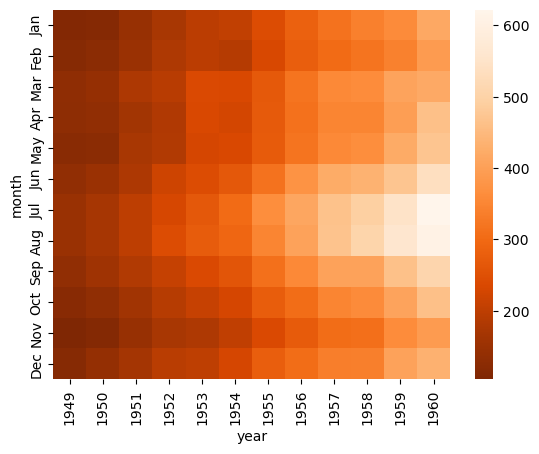

In [18]:
flights.pivot_table(index='month',columns='year',values='passengers')
fp = flights.pivot_table(index='month',columns='year',values='passengers')
sns.heatmap(fp,cmap='Oranges_r')

###### Pattern Description
The number of passengers increased as the years passed. Moreover, the months with the most passengers within their respective years were July to August.

# RESTAURANT STUDY
Dataset about customers of a restaurant

In [19]:
customers = sns.load_dataset('tips')
customers.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### Group Size and Day

<Axes: xlabel='day', ylabel='count'>

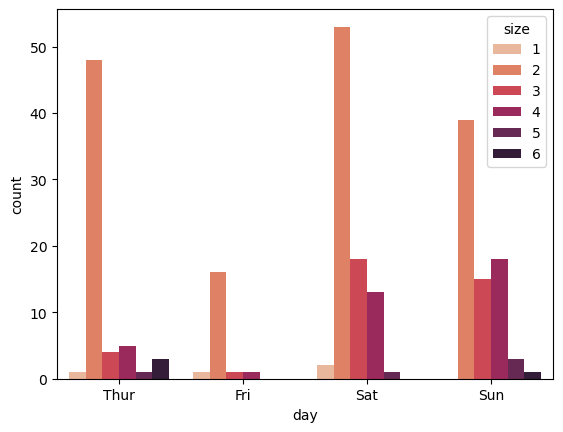

In [20]:
sns.countplot(x='day',data=customers,hue='size',palette='rocket_r')

###### Count Distribution
The restaurant mostly has customers in a group size of 2 people.

There are no solo customers on Sunday and no customer group size of 6 on Friday and Saturday.